# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [2]:
# Geographic libraries
import geopandas as gpd
from shapely.geometry import Point

# Data manipulation
import pandas as pd
import numpy as np

# graph
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Analysis/Modeling
Do work here

In [5]:
gdf = gpd.read_file('outputs/newvars_surveys.geojson', driver='GeoJSON')

In [6]:
gdf.head()

,latitude,longitude,venta_frutas,venta_verduras,superficie_bodega,num_personas,hora_apertura_semana,hora_cierre_semana,abre_fin_de_semana,horario_atencion_igual,...,gps_altitude,ventaFyV,in_food_desert,index_right,distrito,distance_to_market,dist_2closest_mkt,index_right2,NSE07,geometry
0,-11.96299,-77.01987,1.0,1.0,None,NaN,None,None,None,None,...,NaN,3,True,30,SAN JUAN DE LURIGANCHO,12230.42245,1127.519607,20742.0,None,POINT (-77.01987 -11.96299)
1,-12.00862,-76.97680,1.0,1.0,None,NaN,None,None,None,None,...,NaN,3,True,30,SAN JUAN DE LURIGANCHO,NaN,1244.469289,69383.0,ME,POINT (-76.9768 -12.00862)
2,-12.00912,-76.97629,1.0,1.0,None,NaN,None,None,None,None,...,NaN,3,True,30,SAN JUAN DE LURIGANCHO,NaN,1243.880937,69388.0,ME,POINT (-76.97629000000001 -12.00912)
3,-12.00759,-76.97502,0.0,0.0,None,NaN,None,None,None,None,...,NaN,0,True,30,SAN JUAN DE LURIGANCHO,NaN,1431.075633,NaN,None,POINT (-76.97502 -12.00759)
4,-12.22318,-76.97934,1.0,1.0,None,NaN,None,None,None,None,...,NaN,3,True,27,CHORRILLOS,12230.42245,2204.734733,89397.0,None,POINT (-76.97933999999999 -12.22318)


In [7]:
city_blocks = gpd.read_file('inputs/manzanas_nse/mz_lima_region.shp') 

In [8]:
city_blocks.head()

,IDMANZANA,CODZONA,CODMZNA,CLASIFICAC,UBIGEO,NOMBREMZNA,URBANIZACI,NSE07,POB07,VIV07,LONGITUDE,LATITUDE,geometry
0,150728,None,None,1,150728,None,None,None,0,0,-76.671052,-11.916842,"POLYGON ((-76.67378600000001 -11.916084, -76.6..."
1,150728,None,None,1,150728,None,ASOC PUEBLO NUEVO DE BUENOS AIRES,None,0,0,-76.672482,-11.914053,"POLYGON ((-76.67319000000001 -11.914454, -76.6..."
2,150728,None,None,1,150728,None,ASOC PUEBLO NUEVO DE BUENOS AIRES,None,0,0,-76.673467,-11.914446,"POLYGON ((-76.67368399999999 -11.914412, -76.6..."
3,150728,None,None,1,150728,None,ASOC PUEBLO NUEVO DE BUENOS AIRES,None,0,0,-76.673106,-11.914645,"POLYGON ((-76.673509 -11.914734, -76.673212000..."
4,150728,None,None,1,150728,None,ASOC PUEBLO NUEVO DE BUENOS AIRES,None,0,0,-76.672936,-11.914838,"POLYGON ((-76.67334700000001 -11.914924, -76.6..."


In [9]:
gdf.shape

(710, 39)

In [11]:
gdf_nse = gpd.sjoin(left_df=gdf,
              right_df=city_blocks[['NSE07','geometry']],
              how='left',
              op='intersects',
              lsuffix='left3',
              rsuffix='right3')

In [12]:
gdf_nse.isna().sum()

latitude                         0
longitude                        0
venta_frutas                    90
venta_verduras                  90
superficie_bodega              712
num_personas                   305
hora_apertura_semana           326
hora_cierre_semana             327
abre_fin_de_semana             327
horario_atencion_igual         371
hora_apertura_fin_de_semana    475
hora_cierre_fin_de_semana      478
num_entregas_general           130
num_recojos_general            153
num_lugares                    405
num_entregas_fv                419
num_recojos_fv                 418
lugar_principal                439
vehiculo_recojo                433
vehiculo_recojo_other          690
num_viajes_lugar_principal     431
cant_carga                     425
cant_sku                       419
cadena_frio                    411
cant_merma                     426
motivo_si_oferta               503
motivo_si_oferta_other         661
motivo_no_oferta               497
motivo_no_oferta_oth

In [13]:
nanostores = pd.read_csv('inputs/nanostores.csv')

In [14]:
nanostores = gpd.GeoDataFrame(
    data=nanostores,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(nanostores['COORDX'], nanostores['COORDY'])]
)

In [15]:
nanostores.head()

,NOMBCOMP1,ZONADIST,RUTA,NOM_GIRO,NOM_SUBGIRO,ZONAPOSTAL,TELEFONO,DOMICILIO,DISTRITO,DESCRIP,COORDX,COORDY,DIRFISCAL,DIRENTREGA,DESCRIP_DEPA,geometry
0,"LANDEO AQUINO, JAQUELIN MARGARITA",2,3,NaN,NaN,150143,NaN,URB VILLA MARIA T. JR EL CARMEN Nro.301 ...,43,VILLA MARIA DEL TRIUNFO,-76.950193,-12.163427,JR. EL CARMEN NRO.321 LIMA-LIMA-VILLA M...,URB VILLA MARIA T. JR EL CARMEN Nro.301,LIMA,POINT (-76.950193 -12.163427)
1,"RIVAS DE AVILA, MARCELA",2,3,NaN,NaN,150143,2595098,JR TUPAC AMARU Nro.224 ...,43,VILLA MARIA DEL TRIUNFO,-76.932361,-12.175411,LIMA-LIMA-VILLA MARIA DEL TRIUNFO,JR TUPAC AMARU Nro.224,LIMA,POINT (-76.932361 -12.175411)
2,"TICONA MAMANI, MELECIO JULIAN",2,3,NaN,NaN,150142,NaN,GRP 8-A SECTOR 6 Mz.C Lt.8 ...,42,VILLA EL SALVADOR,-76.942572,-12.225661,GRUPO 8A NRO.MZ-C LT-8 SECTOR 6 LIMA-LIMA...,GRP 8-A SECTOR 6 Mz.C Lt.8,LIMA,POINT (-76.942572 -12.225661)
3,"RUIZ GAMBOA, GRACIELA",2,3,NaN,NaN,150142,NaN,AH OASIS SEC 10 GPO 3 Mz.S Lt.24 ...,42,VILLA EL SALVADOR,-76.932987,-12.242253,NaN,NaN,LIMA,POINT (-76.932987 -12.242253)
4,"MARAVI LOPEZ, MOISES",2,3,NaN,NaN,150130,NaN,CA DOMINGUEZ Nro.155 ...,30,SAN BORJA,-76.993697,-12.087312,NaN,NaN,LIMA,POINT (-76.993697 -12.087312)


In [16]:
lima_grid = pd.read_csv('inputs/LIM_ClustersData.csv')

In [18]:
lima_grid.head(1)

,index,population,count_intersections,streets_per_node_avg,betweenness_centrality_avg,primary_length_total_ext,highway_length_total_ext,fraction_oneway_ext,N_BFA,N_OtherServices,...,Prin6,Prin7,kopt+0_Clusters,kopt+1_Clusters,kopt+2_Clusters,lat,lon,utm_n,utm_e,geometry
0,117,1461,114,3.041322,0.059484,0.0,0.0,0.164404,24,4,...,1.818972,-0.103226,4,0,0,-12.330026,-76.826524,8636276.063,301380.8033,POINT (-76.82652389 -12.33002618)


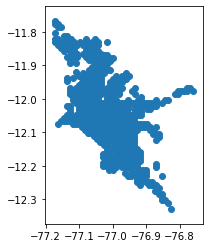

In [19]:
lima_grid.plot()

In [20]:
# Coordinate system
proj_utm = {'datum': 'WGS84', 'ellps': 'WGS84', 'proj': 'utm', 'zone': 18, 'units': 'm'}

In [21]:
import osmnx as ox

In [22]:
lima_grid_proj = lima_grid.to_crs(proj_utm)

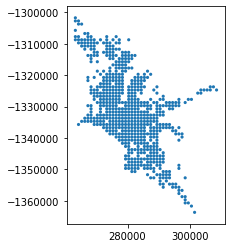

In [23]:

buffer.plot()

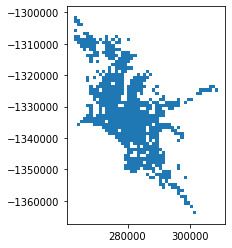

In [24]:

envelope.plot()

In [25]:
test_g = nanostores.iloc[:10,:]

In [26]:
nanostores.crs

{'init': 'epsg:4326'}

In [27]:
nanostores_proj = nanostores.to_crs(proj_utm)

In [28]:
test_r = gpd.GeoDataFrame(crs=proj_utm, geometry=envelope)

In [29]:
gdf_sjoin = gpd.sjoin(left_df=nanostores_proj, right_df=test_r, how='left', op='within')

In [30]:
ns_count = gdf_sjoin.groupby(by='index_right').count()

In [31]:
lima_grid['nanostore_count'] = np.zeros(shape=len(lima_grid))

In [32]:
lima_grid.loc[ns_count.index,'nanostore_count'] = ns_count.iloc[:,0].values

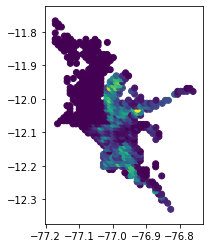

In [33]:
lima_grid.plot(column='nanostore_count')

In [34]:
lima_grid['grid_geometry'] = envelope

In [35]:
grid_ns_count = gpd.GeoDataFrame(data=ns_count.iloc[:,0].values,
                 crs=proj_utm,
                 geometry=envelope)

In [36]:
lima_grid.to_csv('outputs/lima_grid_c_nscount.csv')

In [111]:
gdf_sjoin = gpd.sjoin(left_df=city_blocks, right_df=test_r, how='left', op='within')

/Users/cortega/Documents/food_deserts/food_deserts_env/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [114]:
city_blocks_proj = city_blocks.to_crs(proj_utm)

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here